In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import qiskit
from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute

In [3]:
def qft(circ, q, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        for k in range(j):
            circ.cu1(math.pi / float(2 ** (j - k)), q[j], q[k])
        circ.h(q[j])

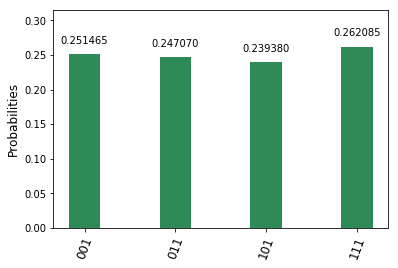

In [4]:
import math

# Page 15.
M = 8  # Length.
r = 2  # Period.
s = 1  # Offset.
desired_vector = [math.sqrt(r / M) * (i % r == s) for i in range(M)]

q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

qc.initialize(desired_vector, [q[0],q[1],q[2]])
qc.measure(q, c)
backend = 'local_qasm_simulator'
plot_histogram(execute(qc, backend, shots=8192).result().get_data()['counts'])

In [5]:
qc = QuantumCircuit(q, c)
qc.initialize(desired_vector, [q[0], q[1], q[2]])
# QFT.
qft(qc, q, 3)
qc.measure(q, c)

backend = 'local_qasm_simulator'
result = execute(qc, backend, shots=8192).result()

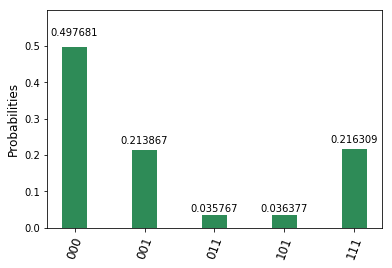

In [6]:
plot_histogram(result.get_data()['counts'])